# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** [Halilatunnisa]
- **Email:** [halilatunnisa08@gmail.com]
- **ID Dicoding:** [halilatunnisa]

## Menentukan Pertanyaan Bisnis

- Produk mana yang memberikan kontribusi pendapatan terbesar berdasarkan total nilai transaksi selama periode Januari 2017 – Desember 2017?
- Wilayah geografis mana yang memiliki konsentrasi pelanggan tertinggi berdasarkan jumlah customer_unique_id selama periode Januari 2017 – Desember 2017?

## Import Semua Packages/Library yang Digunakan

In [479]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib
import matplotlib.image as mpimg
from scipy import stats
import os

## Data Wrangling

### Gathering Data

In [411]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [412]:
base_path = "/content/drive/MyDrive/Kuliah/E-Commerce Public Dataset/"

file_names = {
    "orders": "orders_dataset.csv",
    "order_items": "order_items_dataset.csv",
    "products": "products_dataset.csv",
    "payments": "order_payments_dataset.csv",
    "reviews": "order_reviews_dataset.csv",
    "customers": "customers_dataset.csv",
    "sellers": "sellers_dataset.csv",
    "geolocation": "geolocation_dataset.csv",
    "category_translation": "product_category_name_translation.csv"
}

data = {key: pd.read_csv(os.path.join(base_path, value))
        for key, value in file_names.items()}

In [413]:
data['orders'].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [414]:
data['order_items'].head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [415]:
data['products'].head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [416]:
data['payments'].head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [417]:
data['reviews'].head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [418]:
data['customers'].head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [419]:
data['sellers'].head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [420]:
data['geolocation'].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [421]:
data['category_translation'].head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### Assessing Data

Periksa Tipe data

In [422]:
for df_name, df in data.items():
  print('\n', data[df_name].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB

 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  

In [423]:
data["orders"]["order_purchase_timestamp"] = pd.to_datetime(
    data["orders"]["order_purchase_timestamp"]
)

# Filter periode setelah datetime dikonversi
orders_filtered = data["orders"][
    (data["orders"]["order_purchase_timestamp"] >= "2017-01-01") &
    (data["orders"]["order_purchase_timestamp"] <= "2017-12-31")
]

order_id_periode = orders_filtered["order_id"].to_numpy()

# Filter seluruh dataset berdasarkan order_id dalam periode
for nama_tabel, df in data.items():
    if "order_id" in df.columns:
        data[nama_tabel] = df[df["order_id"].isin(order_id_periode)]

In [424]:
datetime_columns = {
    "orders": [
        "order_purchase_timestamp",
        "order_approved_at",
        "order_delivered_carrier_date",
        "order_delivered_customer_date",
        "order_estimated_delivery_date"
    ],
    "order_items": ["shipping_limit_date"],
    "reviews": ["review_creation_date", "review_answer_timestamp"]
}

for table, columns in datetime_columns.items():
    for col in columns:
        data[table][col] = pd.to_datetime(data[table][col])

Periksa Duplikat

In [425]:
jumlah_duplikat = {}
total_data = {}

for nama_df, isi_df in data.items():
    jumlah_duplikat[nama_df] = isi_df.duplicated().sum()
    total_data[nama_df] = isi_df.shape[0]

df_duplikat = pd.DataFrame(jumlah_duplikat.items(),
                           columns=["Dataset", "Jumlah Duplikat"]).set_index("Dataset")

df_total = pd.DataFrame(total_data.items(),
                        columns=["Dataset", "Total Data"]).set_index("Dataset")

hasil_ringkasan = df_total.join(df_duplikat)

hasil_ringkasan

,Total Data,Jumlah Duplikat
Dataset,,
orders,45027,0
order_items,50786,0
products,32951,0
payments,47447,0
reviews,44971,0
customers,99441,0
sellers,3095,0
geolocation,1000163,261831
category_translation,71,0


Periksa Missing Value

In [426]:
jumlah_null = {}

for nama, df in data.items():
    total_null = df.isnull().sum()
    jumlah_null[nama] = total_null

    print(f"Dataset: {nama}")
    print(total_null)
    print("-" * 40)

Dataset: orders
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  72
order_delivered_carrier_date     1143
order_delivered_customer_date    1672
order_estimated_delivery_date       0
dtype: int64
----------------------------------------
Dataset: order_items
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
----------------------------------------
Dataset: products
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64
---------------------------------------

### Cleaning Data

Order

In [427]:
# Untuk analisis ini, hanya fokus pada pesanan yang sudah terkirim
status_pesanan = data["orders"]["order_status"].value_counts()

print(status_pesanan)

order_status
delivered      43357
shipped          528
unavailable      457
canceled         264
processing       240
invoiced         175
created            4
approved           2
Name: count, dtype: int64


In [428]:
# Menghitung persentase order dengan status delivered
total_order = len(data["orders"])
jumlah_delivered = data["orders"]["order_status"].value_counts()["delivered"]

persentase_delivered = round((jumlah_delivered / total_order) * 100, 2)

print(f"Jika hanya mengambil pesanan yang delivered, kita masih memiliki {persentase_delivered}% dari total data.")

Jika hanya mengambil pesanan yang delivered, kita masih memiliki 96.29% dari total data.


In [429]:
# Ambil daftar order_id yang bukan delivered
order_tidak_terkirim = data["orders"].loc[
    data["orders"]["order_status"] != "delivered",
    "order_id"
].to_numpy()

# Hapus baris pada setiap dataset yang memiliki order_id tersebut
for nama_tabel, df in data.items():
    if "order_id" in df.columns:
        data[nama_tabel] = df[~df["order_id"].isin(order_tidak_terkirim)]

In [430]:
# Persentase nilai kosong di setiap kolom
for nama_df, df in data.items():
    for nama_kolom in df.columns:
        jumlah_kosong = df[nama_kolom].isna().sum()

        if jumlah_kosong > 0:
            persen_kosong = (jumlah_kosong / df.shape[0]) * 100
            print(f"{nama_df} - {nama_kolom} (%): {persen_kosong}")

orders - order_approved_at (%): 0.032290056968886226
orders - order_delivered_carrier_date (%): 0.004612865281269461
orders - order_delivered_customer_date (%): 0.004612865281269461
products - product_category_name (%): 1.8512336499650999
products - product_name_lenght (%): 1.8512336499650999
products - product_description_lenght (%): 1.8512336499650999
products - product_photos_qty (%): 1.8512336499650999
products - product_weight_g (%): 0.006069618524475737
products - product_length_cm (%): 0.006069618524475737
products - product_height_cm (%): 0.006069618524475737
products - product_width_cm (%): 0.006069618524475737
reviews - review_comment_title (%): 99.9723164232819
reviews - review_comment_message (%): 58.97524626848456


In [431]:
jumlah_tanpa_tanggal_kirim = data["orders"]["order_delivered_customer_date"].isna().sum()

print(f"Terdapat {jumlah_tanpa_tanggal_kirim} pesanan yang belum memiliki tanggal pengiriman.")

Terdapat 2 pesanan yang belum memiliki tanggal pengiriman.


In [432]:
# Ambil order_id yang tidak memiliki tanggal sampai ke customer
order_tanpa_tanggal = data["orders"].loc[
    data["orders"]["order_delivered_customer_date"].isna(),
    "order_id"
].to_numpy()

# Hapus baris terkait di seluruh tabel yang memiliki kolom order_id
for nama_df, df in data.items():
    if "order_id" in df.columns:
        indeks_hapus = df[df["order_id"].isin(order_tanpa_tanggal)].index
        df.drop(index=indeks_hapus, inplace=True)

In [433]:
# Membuat indikator apakah pesanan sampai tepat waktu atau tidak
orders_df = data["orders"]

orders_df["status_ketepatan"] = np.where(
    orders_df["order_delivered_customer_date"]
    < orders_df["order_estimated_delivery_date"],
    "On Time",
    "Late"
)

Reviews

In [434]:
# Melihat daftar kolom pada dataset reviews
print("Kolom pada dataset reviews:", list(data["reviews"].columns))

# Kolom review_comment_title memiliki banyak nilai kosong, jadi dihapus
kolom_dihapus = ["review_comment_title"]

data["reviews"] = data["reviews"].drop(columns=kolom_dihapus)

Kolom pada dataset reviews: ['review_id', 'order_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp']


In [435]:
# Jika tidak ada komentar = 0, jika ada komentar = 1

reviews_df = data["reviews"]

reviews_df["indikator_komentar"] = (
    reviews_df["review_comment_message"]
    .notna()
    .astype(int)
)

In [436]:
# Menggabungkan payments dengan reviews berdasarkan order_id
gabungan_payment_review = data["payments"].merge(
    data["reviews"],
    on="order_id",
    how="left"
)

# Membuat indikator: jika ada komentar = 1, jika tidak = 0
gabungan_payment_review["review_comment_message"] = (
    gabungan_payment_review["review_comment_message"]
    .notna()
    .astype(int)
)

gabungan_payment_review.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp,indikator_komentar
0,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,1,2017-12-19,2017-12-22 17:55:30,1.0
1,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,0,2017-12-21,2017-12-21 21:42:31,0.0
2,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,0,2017-12-21,2017-12-22 01:10:39,0.0
3,771ee386b001f06208a7419e4fc1bbd7,1,credit_card,1,81.16,35f54313f077af011b5e3a8f0dafb9d7,5.0,1,2017-07-04,2017-07-05 00:12:17,1.0
4,3d7239c394a212faae122962df514ac7,1,credit_card,3,51.84,1e23005084e0ca486cb6be7f343ab1ef,4.0,0,2017-06-24,2017-06-27 11:04:19,0.0


Products

In [437]:
# Menampilkan daftar kolom pada dataset products
print("Kolom pada dataset products:", list(data["products"].columns))

# Menghapus kolom yang tidak digunakan dalam analisis
kolom_tidak_dipakai = [
    "product_name_lenght",
    "product_description_lenght",
    "product_weight_g",
    "product_length_cm",
    "product_height_cm",
    "product_width_cm"
]

data["products"] = data["products"].drop(columns=kolom_tidak_dipakai)

Kolom pada dataset products: ['product_id', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']


In [438]:
# Mengganti nilai kosong pada kategori produk menjadi 'outro'
data["products"]["product_category_name"] = (
    data["products"]["product_category_name"]
    .fillna("outro")
)

In [439]:
# Mengisi nilai kosong pada jumlah foto produk dengan 0
data["products"]["product_photos_qty"] = (
    data["products"]["product_photos_qty"]
    .fillna(0)
)

Geolocations

In [440]:
# Menghapus baris duplikat pada dataset geolocation
data["geolocation"] = data["geolocation"].drop_duplicates()

## Exploratory Data Analysis (EDA)

### Explore Customer

In [441]:
data['customers'].sample(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
68209,a1a6d4f18deef15fee3ad4b6f36a7ce0,1c83b776b851b057dcc32bb2fa5edbdd,9401,ribeirao pires,SP
13321,30ba20c34cecd817b4390cfcbb66f0d3,9ba17a57258e3bd8caf117aea95dc59d,44077,feira de santana,BA
60931,76b10e7807773c14873820db20ae1b56,4febcf117fb1744228c5c3fb7e2a1c76,88330,balneario camboriu,SC
65323,4e2a379354e75a4545a46fe69949844f,7089338086f563475ee59d1a0cd64ebc,90610,porto alegre,RS
29188,7e42e1b6d62913f7c891b8418c7e6481,3220a93bfab5bfd51b0a0e33becf823f,87360,goioere,PR
22588,df3be1c92fa27cda84caa922db80c785,8c81f00d5f170ff5a91ddd77f2aa5b70,22770,rio de janeiro,RJ
60258,52a9dc68b108aba2ed1776eb6cda5c0f,6261da496d2a146c1f1aa2b58c21e5dc,36025,juiz de fora,MG
67907,cec0f9df31c64636ab663d68079cfb2f,1930cde7df82e29f586ff77a81b36e5d,85550,coronel vivida,PR
31862,984053678c911516cd2eef9c66632357,4ea472e8a806da1db6126a573e4b08d2,38800,sao gotardo,MG
76094,9f03c12d78d5dfec18b888fc6bc7ecb7,3d540559ce0677a17f45eab0cb113c8d,58040,joao pessoa,PB


In [442]:
jumlah_customer_kota = (
    data["customers"]
    .groupby("customer_city")["customer_id"]
    .nunique()
    .sort_values(ascending=False)
)

jumlah_customer_kota

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
agisse,1
vieiras,1
bertopolis,1


In [443]:
jumlah_customer_state = (
    data["customers"]
    .groupby("customer_state")["customer_id"]
    .nunique()
    .sort_values(ascending=False)
)

jumlah_customer_state

,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


### Explore payments

In [444]:
data['payments'].sample(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
55455,8a4398f9b38e8023cd570362226cabb9,1,credit_card,1,64.74
45755,f789a918deafa2b5038816382156c930,1,credit_card,1,48.01
85326,da5d566236538abb69c83b6283383b60,1,credit_card,5,50.92
70643,dcbb4f4f03f210340fce92e1f51982a0,1,credit_card,2,50.09
78745,fc49594233f3f2be65bbb04bb82140b6,1,credit_card,1,65.11
76176,e985dab0862fa067f40e4c0d54a7405f,1,credit_card,1,48.32
60050,bb8feb5c5a3d07a1e5e2ae3670a27910,1,boleto,1,78.65
30719,e4a664fb766c91a75ec091362183c42f,1,credit_card,2,56.78
6460,ae917963181c56c14f8d0e873b1588ac,1,boleto,1,406.14
56027,c5585ae33ee215aeee0d7f9aaec67cde,1,boleto,1,168.03


In [445]:
jumlah_order_per_payment = (
    data["payments"]
    .groupby("payment_type")["order_id"]
    .nunique()
    .sort_values(ascending=False)
)

jumlah_order_per_payment

,order_id
payment_type,
credit_card,33099
boleto,9129
voucher,1844
debit_card,406


### Explore orders

In [446]:
data['orders'].sample(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,status_ketepatan
27359,e132fb294c905406ab1ce97278595b0b,a52bc8934491cdd988e9e063be7656c4,delivered,2017-04-26 20:15:59,2017-04-27 20:22:54,2017-05-09 10:23:16,2017-05-16 14:37:33,2017-06-20,On Time
39982,a68bc190188549b7f338cbff5d091091,073da58beece042f898c92ff46d41dfb,delivered,2017-04-06 00:13:48,2017-04-06 01:06:37,2017-04-07 09:55:57,2017-04-11 10:20:28,2017-05-04,On Time
90186,5a3b92a2c03f3b83b187d713f47ebe8e,a5026c06f1b1d8330badd5bbefabce2d,delivered,2017-10-05 15:37:40,2017-10-06 02:14:36,2017-10-06 19:47:09,2017-10-09 13:47:46,2017-10-24,On Time
37617,f16599b98c62d8e9ee08de8c41bed3d1,9bfe7794e18a8c329058e8a117cde1f4,delivered,2017-02-10 16:57:36,2017-02-15 11:33:00,2017-02-17 14:14:52,2017-02-21 18:24:57,2017-03-13,On Time
89106,ab82b0d931d692c586fadda4ef9c1397,5b99d2ac45d9e913fa37e13a7e73f1fc,delivered,2017-07-18 10:14:14,2017-07-19 03:50:27,2017-07-21 15:11:51,2017-07-28 21:45:51,2017-08-14,On Time
17134,0da06a931a4d76045f42c40211501383,7773ea1eca2e879eae21ac7d62ca7054,delivered,2017-11-16 12:35:19,2017-11-17 03:55:41,2017-11-21 10:15:37,2017-12-04 21:08:01,2017-12-05,On Time
93975,f134e34406f256fc9b9a0b898cbbd5c2,94307d2d9391d8a7162e8f218a6185dd,delivered,2017-02-13 03:48:46,2017-02-13 04:03:31,2017-02-20 07:27:27,2017-02-22 16:38:29,2017-03-17,On Time
70375,3d56216916c4f573940c222a4d3e763d,b8d6201394a9836b34de56193754471c,delivered,2017-07-26 17:16:18,2017-07-28 08:43:46,2017-08-01 17:55:34,2017-08-09 17:48:15,2017-08-22,On Time
74117,6e82dcfb5eada6283dba34f164e636f5,59b42de1617fdda0b327375d35efd708,delivered,2017-05-17 19:09:02,2017-05-18 19:22:29,2017-05-19 10:57:36,2017-11-16 10:56:45,2017-06-14,Late
68821,3fd1f1349635cb4c9b1f43de5594396e,cac8a50eab2329acd08644589cc1d5e5,delivered,2017-09-21 14:30:27,2017-09-21 14:44:47,2017-09-25 19:17:55,2017-09-27 18:11:53,2017-10-13,On Time


In [447]:
ringkasan_ketepatan = data["orders"]["status_ketepatan"].describe()
ringkasan_ketepatan

,status_ketepatan
count,43355
unique,2
top,On Time
freq,40478


### Explore customers dan orders

In [448]:
# Menggabungkan data customers dengan orders berdasarkan customer_id
gabungan_customer_order = data["customers"].merge(
    data["orders"],
    on="customer_id",
    how="left"
)

gabungan_customer_order.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,status_ketepatan
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,On Time
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaN
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaN
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaN
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,NaN,NaN,NaT,NaT,NaT,NaT,NaT,NaN


In [449]:
gabungan_payment_review["review_comment_message"] = (
    gabungan_payment_review["review_comment_message"]
    .notna()
    .astype(int)
)

gabungan_payment_review.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp,indikator_komentar
0,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,1,2017-12-19,2017-12-22 17:55:30,1.0
1,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,1,2017-12-21,2017-12-21 21:42:31,0.0
2,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,1,2017-12-21,2017-12-22 01:10:39,0.0
3,771ee386b001f06208a7419e4fc1bbd7,1,credit_card,1,81.16,35f54313f077af011b5e3a8f0dafb9d7,5.0,1,2017-07-04,2017-07-05 00:12:17,1.0
4,3d7239c394a212faae122962df514ac7,1,credit_card,3,51.84,1e23005084e0ca486cb6be7f343ab1ef,4.0,1,2017-06-24,2017-06-27 11:04:19,0.0


In [450]:
payments_reviews_df = gabungan_payment_review.copy()

# Urutkan berdasarkan nilai pembayaran
payments_reviews_df.sort_values(by="payment_value", ascending=False).head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp,indikator_komentar
23014,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08,211fa81a22870cc634265ea85b751e40,1.0,1,2017-10-18,2017-10-19 13:10:39,1.0
18287,0812eb902a67711a1cb742b3cdaa65ae,1,credit_card,8,6929.31,e2fbd9f0ef7b724c7ecb351601a857e7,5.0,1,2017-03-04,2017-03-04 21:40:41,1.0
37777,f5136e38d1a14a4dbd87dff67da82701,1,boleto,1,6726.66,1b73e6c7cd135008ebeb18404b776ddc,5.0,1,2017-06-06,2017-06-07 19:35:23,0.0
27562,2cc9089445046817a7539d90805e6e5a,1,boleto,1,6081.54,4069f5f76abb1cf501f2d4e614e1eaa4,1.0,1,2017-12-14,2017-12-14 15:30:42,0.0
19121,a96610ab360d42a2e5335a3998b4718a,1,credit_card,10,4950.34,52632252782892317727260a87bc0663,5.0,1,2017-04-18,2017-04-21 15:17:33,0.0


In [451]:
payments_reviews_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value":  ["min", "max"]
})

order_id payment_value          
              nunique           min       max
payment_type                                 
boleto           9129         11.62   6726.66
credit_card     33099          0.01  13664.08
debit_card        406         19.77    499.40
voucher          1844          0.00   1522.42

In [452]:
# Menggabungkan data customer-orders dengan payment-review berdasarkan order_id
customers_df = gabungan_customer_order.merge(
    payments_reviews_df,
    on="order_id",
    how="left"
)

customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp,indikator_komentar
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,1.0,2017-05-26,2017-05-30 22:34:40,0.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,NaN,NaN,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,NaN,NaN,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,NaN,NaN,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,NaN,NaN,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN


### Explore items dan sellers

In [453]:
# Menggabungkan order_items dengan sellers
item_seller_df = pd.merge(
    left=data['order_items'],
    right=data['sellers'],
    how="left",
    on="seller_id"
)

item_seller_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,3471,sao paulo,SP
2,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.9,18.14,87900,loanda,PR
3,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.9,12.69,14091,ribeirao preto,SP
4,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.9,11.85,1026,sao paulo,SP


In [454]:
item_seller_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).head(10)

,seller_id
seller_city,
sao paulo,379
curitiba,87
rio de janeiro,48
belo horizonte,44
ribeirao preto,29
ibitinga,27
campinas,25
santo andre,24
maringa,23


In [455]:
item_seller_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False).head(10)

,seller_id
seller_state,
SP,1002
PR,203
MG,154
SC,103
RJ,90
RS,59
DF,21
GO,16
BA,9


###Explore products dan category

In [456]:
# Menggabungkan products dengan category translation
product_df = pd.merge(
    left=data['products'],
    right=data['category_translation'],
    how="left",
    on="product_category_name"
)

product_df.head()

,product_id,product_category_name,product_photos_qty,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,1.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,1.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,1.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,4.0,housewares


In [457]:
product_df.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False).head(10)

,product_id
product_category_name,
cama_mesa_banho,3029
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335
automotivo,1900
informatica_acessorios,1639
brinquedos,1411
relogios_presentes,1329


In [458]:
product_df.groupby(by="product_category_name_english").product_id.nunique().sort_values(ascending=False).head(10)

,product_id
product_category_name_english,
bed_bath_table,3029
sports_leisure,2867
furniture_decor,2657
health_beauty,2444
housewares,2335
auto,1900
computers_accessories,1639
toys,1411
watches_gifts,1329


In [459]:
# Menggabungkan product_df dengan item_seller_df
sellers_df = pd.merge(
    left=product_df,
    right=item_seller_df,
    on="product_id",
    how="left"
)

sellers_df.head()

,product_id,product_category_name,product_photos_qty,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,1.0,perfumery,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1.0,art,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,1.0,sports_leisure,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
3,cef67bcfe19066a932b7673e239eb23d,bebes,1.0,baby,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,4.0,housewares,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN


In [460]:
sellers_df.sort_values(by="price", ascending=False)

,product_id,product_category_name,product_photos_qty,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
11843,489ae2aa008f021502940f251d4cce7f,utilidades_domesticas,2.0,housewares,0812eb902a67711a1cb742b3cdaa65ae,1.0,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.0,194.31,3635.0,sao paulo,SP
29279,1bdf5e6731585cf01aa8169c7028d6ad,artes,2.0,art,f5136e38d1a14a4dbd87dff67da82701,1.0,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.0,227.66,74210.0,goiania,GO
42412,a6492cc69376c469ab6f61d8f44de961,eletroportateis,2.0,small_appliances,a96610ab360d42a2e5335a3998b4718a,1.0,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.0,151.34,13480.0,limeira,SP
18888,c3ed642d592594bb648ff4a04cee2747,eletroportateis,2.0,small_appliances,199af31afc78c699f0dbf71fb178d4d4,1.0,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.0,74.34,13480.0,limeira,SP
23717,6902c1962dd19d540807d0ab8fade5c6,relogios_presentes,2.0,watches_gifts,86c4eab1571921a6a6e248ed312f5a5a,1.0,fa1c13f2614d7b5c4749cbc52fecda94,2017-03-23 20:08:04,3999.9,17.01,13170.0,sumare,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65615,d218a47759ef0d1db44044934909b88b,telefonia,1.0,telephony,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
65619,6ec96c91757fad0aecafc0ee7f262dcc,bebes,1.0,baby,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
65622,1a14237ecc2fe3772b55c8d4e11ccb35,moveis_decoracao,3.0,furniture_decor,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
65635,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,1.0,construction_tools_lights,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN


In [461]:
kategori_summary = sellers_df.groupby("product_category_name_english").agg({
    "order_id": "nunique",
    "price": ["min", "max"]
}).reset_index()

kategori_summary

product_category_name_english order_id  price         
                                  nunique    min      max
0     agro_industry_and_commerce       48  21.99  2990.00
1               air_conditioning      110  10.90   869.95
2                            art       32   5.35  6499.00
3          arts_and_craftmanship        2  21.99   129.90
4                          audio      159  14.90   598.99
..                           ...      ...    ...      ...
66                    stationery      891   2.29   699.00
67        tablets_printing_image       59  14.90   889.99
68                     telephony     1966   6.90   949.00
69                          toys     2400   8.49  1699.99
70                 watches_gifts     2068  10.99  3999.90

[71 rows x 4 columns]

###Explore geolocation

In [462]:
data['geolocation'].sample(10)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
364250,16700,-21.241361,-50.652100,guararapes,SP
114876,5054,-23.537907,-46.699263,sao paulo,SP
940110,90020,-30.030196,-51.226788,porto alegre,RS
181226,7084,-23.426481,-46.546203,guarulhos,SP
465599,23573,-22.912044,-43.657572,rio de janeiro,RJ
819535,77960,-5.472328,-47.890513,augustinopolis,TO
421839,21050,-22.879644,-43.261624,rio de janeiro,RJ
97955,4614,-23.616344,-46.672140,são paulo,SP
536695,29395,-20.235054,-41.510529,ibatiba,ES
824029,78360,-13.654855,-57.886197,campo novo do parecis,MT


In [463]:
jumlah_per_zip = data['geolocation'].groupby('geolocation_zip_code_prefix').size().sort_values(ascending=False)

jumlah_per_zip

,0
geolocation_zip_code_prefix,
38400,779
35500,751
11680,727
11740,678
36400,627
...,...
58403,1
1200,1
1189,1


In [464]:
# Tampilkan beberapa baris geolocation untuk kode pos 24230
data['geolocation'][data['geolocation']['geolocation_zip_code_prefix'] == 24230].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
470806,24230,-22.911270,-43.105151,niterói,RJ
470807,24230,-22.905032,-43.114682,niterói,RJ
470810,24230,-22.909753,-43.101880,niteroi,RJ
470816,24230,-22.908945,-43.108600,niteroi,RJ
470817,24230,-22.906274,-43.103573,niteroi,RJ


###Explore Semua Data

In [465]:
# Ambil hanya informasi kategori produk per order
order_category = sellers_df[["order_id", "product_category_name_english"]].drop_duplicates()

# Gabungkan dengan customers_df
all_data = customers_df.merge(
    order_category,
    on="order_id",
    how="left"
)

all_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp,indikator_komentar,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,1.0,2017-05-26,2017-05-30 22:34:40,0.0,office_furniture
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,NaN,NaN,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,perfumery
2,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,NaN,NaN,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,art
3,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,NaN,NaN,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,sports_leisure
4,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,NaN,NaN,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,baby


In [466]:
provinsi_summary = all_data.groupby("customer_state").agg({
    "order_id": "nunique",
    "payment_value": "sum"
}).sort_values(by="payment_value", ascending=False).reset_index()

provinsi_summary

,customer_state,order_id,payment_value
0,SP,17036,2467014.27
1,RJ,5964,1030965.39
2,MG,5236,839139.82
3,RS,2586,421347.94
4,PR,2188,340884.81
5,BA,1524,273675.01
6,SC,1649,263284.39
7,GO,913,162852.64
8,DF,880,155645.83
9,PE,732,143826.50


In [467]:
kategori_summary = all_data.groupby("product_category_name_english").agg({
    "order_id": "nunique",
    "review_score": ["min", "max"]
}).reset_index()

kategori_summary

product_category_name_english order_id review_score     
                                  nunique          min  max
0     agro_industry_and_commerce       48          1.0  5.0
1               air_conditioning      110          1.0  5.0
2                            art       32          1.0  5.0
3          arts_and_craftmanship        2          5.0  5.0
4                          audio      159          1.0  5.0
..                           ...      ...          ...  ...
66                    stationery      891          1.0  5.0
67        tablets_printing_image       59          1.0  5.0
68                     telephony     1966          1.0  5.0
69                          toys     2400          1.0  5.0
70                 watches_gifts     2068          1.0  5.0

[71 rows x 4 columns]

In [468]:
output_csv_path = "/content/drive/MyDrive/Kuliah/E-Commerce Public Dataset/df.csv"

# Simpan dataframe all_data ke CSV
all_data.to_csv(output_csv_path, index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Produk mana yang memberikan kontribusi pendapatan terbesar berdasarkan total nilai transaksi selama periode Januari 2017 – Desember 2017?

In [469]:
items_product = data['order_items'].merge(
    data['products'],
    on='product_id',
    how='inner'
)

orders_ip = data['orders'].merge(
    items_product,
    on='order_id',
    how='inner'
)

orders_ip = orders_ip.merge(
    data['category_translation'],
    on='product_category_name',
    how='left'
)

# Group by English category name
product_revenue = orders_ip.groupby('product_category_name_english').agg(
    quantity_sold=('order_item_id', 'count'),
    total_revenue=('price', 'sum')
).reset_index()

top10_products = product_revenue.sort_values(
    by='total_revenue',
    ascending=False
).head(10)

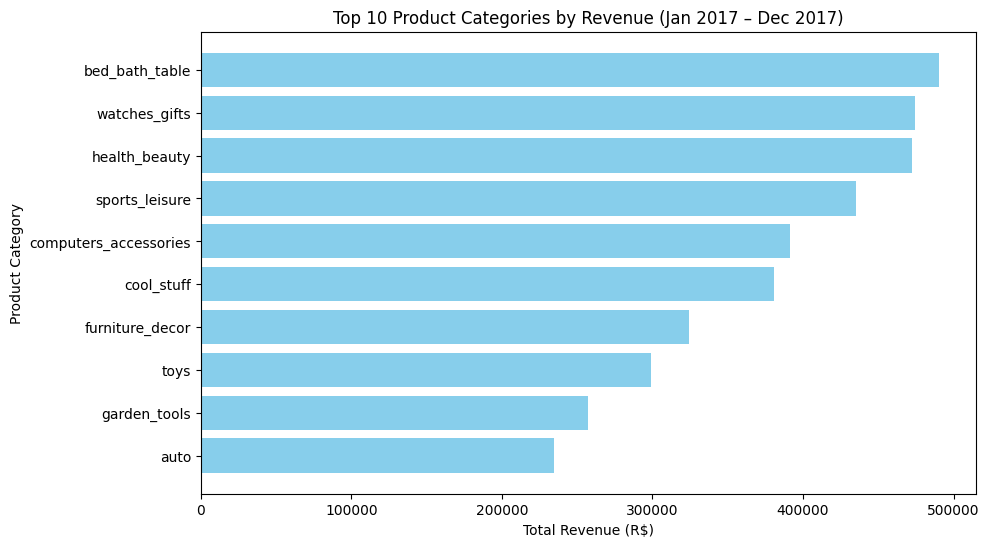

In [470]:
plt.figure(figsize=(10,6))
bars = plt.barh(
    top10_products['product_category_name_english'],
    top10_products['total_revenue'],
    color='skyblue'
)

plt.xlabel("Total Revenue (R$)")
plt.ylabel("Product Category")
plt.title("Top 10 Product Categories by Revenue (Jan 2017 – Dec 2017)")
plt.gca().invert_yaxis()

plt.savefig("/content/drive/MyDrive/Kuliah/E-Commerce Public Dataset/top10_products_revenue.png", dpi=300)
plt.show()

### Pertanyaan 2: Wilayah geografis mana yang memiliki konsentrasi pelanggan tertinggi berdasarkan jumlah customer_unique_id selama periode Januari 2017 – Desember 2017?

In [471]:
# Hitung jumlah state unik per kode pos
other_state_geolocation = data['geolocation'].groupby('geolocation_zip_code_prefix')['geolocation_state'] \
                        .nunique().reset_index(name='count')

# Tampilkan jumlah kode pos yang memiliki >= 2 state
other_state_geolocation[other_state_geolocation['count'] >= 2].shape

# Ambil 1 state saja per kode pos (menghapus duplikat)
max_state = data['geolocation'].groupby(['geolocation_zip_code_prefix', 'geolocation_state']) \
            .size().reset_index(name='count') \
            .drop_duplicates(subset='geolocation_zip_code_prefix') \
            .drop('count', axis=1)

In [472]:
# Hitung median latitude & longitude per kode pos + city + state
geolocation_silver = data['geolocation'].groupby(
    ['geolocation_zip_code_prefix', 'geolocation_city', 'geolocation_state']
)[['geolocation_lat', 'geolocation_lng']].median().reset_index()

# Gabungkan dengan max_state untuk memastikan 1 state per kode pos
geolocation_silver = geolocation_silver.merge(
    max_state,
    on=['geolocation_zip_code_prefix', 'geolocation_state'],
    how='inner'
)

In [473]:
customers_silver = customers_df.merge(
    geolocation_silver,
    left_on='customer_zip_code_prefix',
    right_on='geolocation_zip_code_prefix',
    how='inner'
)

In [474]:
customers_silver.head(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,review_score,review_comment_message,review_creation_date,review_answer_timestamp,indikator_komentar,geolocation_zip_code_prefix,geolocation_city,geolocation_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,4.0,1.0,2017-05-26,2017-05-30 22:34:40,0.0,14409,franca,SP,-20.502307,-47.396740
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,NaN,NaN,NaT,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,9790,sao bernardo do campo,SP,-23.731211,-46.541206
2,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,NaN,NaN,NaT,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,9790,são bernardo do campo,SP,-23.727018,-46.543192
3,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,NaN,NaN,NaT,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,1151,sao paulo,SP,-23.531294,-46.657039
4,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,NaN,NaN,NaT,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,1151,são paulo,SP,-23.531294,-46.656866
5,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,NaN,NaN,NaT,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,8775,mogi das cruzes,SP,-23.499025,-46.183436
6,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,NaN,NaN,NaT,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,13056,campinas,SP,-22.974331,-47.142173
7,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2017-09-14 18:14:31,2017-09-14 18:25:11,2017-09-18 21:27:40,...,5.0,1.0,2017-09-29,2017-10-01 21:52:53,1.0,89254,jaragua do sul,SC,-26.471435,-49.114562
8,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2017-09-14 18:14:31,2017-09-14 18:25:11,2017-09-18 21:27:40,...,5.0,1.0,2017-09-29,2017-10-01 21:52:53,1.0,89254,jaraguá do sul,SC,-26.470583,-49.113512
9,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP,NaN,NaN,NaT,NaT,NaT,...,NaN,NaN,NaT,NaT,NaN,4534,sao paulo,SP,-23.583998,-46.673524


In [475]:
customers_silver = customers_silver.drop_duplicates(subset='order_id')

In [476]:
customers_silver.to_csv("/content/drive/MyDrive/Kuliah/E-Commerce Public Dataset/geolocation.csv", index=False)

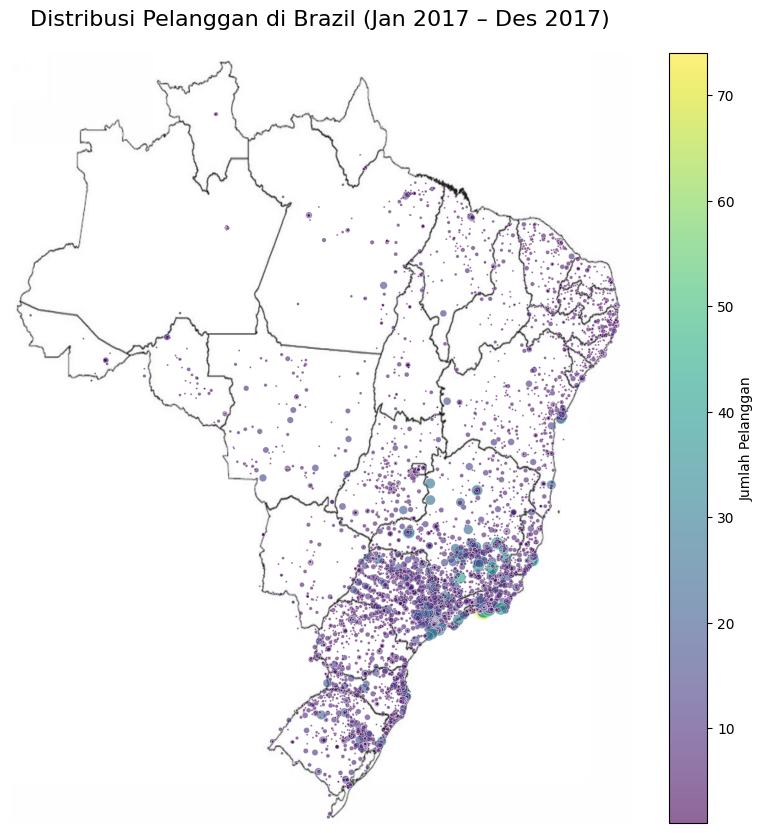

In [477]:
# Hitung jumlah pelanggan per zip code
customers_zip_count = customers_silver.groupby(
    ['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']
)['customer_unique_id'].nunique().reset_index(name='customer_count')

brazil = mpimg.imread(urllib.request.urlopen(
    'https://i.pinimg.com/originals/3a/0c/e1/3a0ce18b3c842748c255bc0aa445ad41.jpg'), 'jpg')

fig, ax = plt.subplots(figsize=(10,10))
sc = ax.scatter(
    customers_zip_count['geolocation_lng'],
    customers_zip_count['geolocation_lat'],
    s=customers_zip_count['customer_count']*2,
    c=customers_zip_count['customer_count'],
    cmap='viridis',
    alpha=0.6,
    edgecolors='w',
    linewidth=0.3
)

ax.imshow(brazil, extent=[-74, -34, -34, 6], aspect='auto', zorder=-1)
ax.set_xlim([-74, -34])
ax.set_ylim([-34, 6])
ax.axis('off')

plt.colorbar(sc, label='Jumlah Pelanggan')
plt.title("Distribusi Pelanggan di Brazil (Jan 2017 – Des 2017)", fontsize=16, pad=20)
plt.savefig("/content/drive/MyDrive/Kuliah/E-Commerce Public Dataset/customer_map.png", dpi=300)
plt.show()

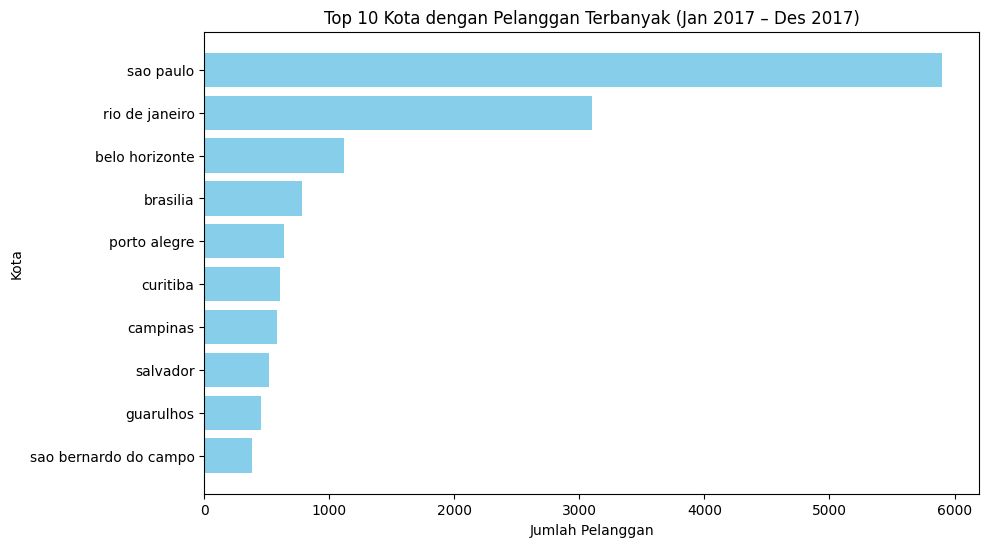

In [478]:
top10_cities = customers_silver.groupby('geolocation_city')['customer_unique_id'] \
               .nunique().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
bars = plt.barh(top10_cities.index[::-1], top10_cities.values[::-1], color='skyblue')

plt.xlabel("Jumlah Pelanggan")
plt.ylabel("Kota")
plt.title("Top 10 Kota dengan Pelanggan Terbanyak (Jan 2017 – Des 2017)")

plt.savefig("/content/drive/MyDrive/Kuliah/E-Commerce Public Dataset/top10_cities.png", dpi=300)
plt.show()

## **Conclusion**

*   Produk mana yang memberikan kontribusi pendapatan terbesar berdasarkan total nilai transaksi selama periode Januari 2017 – Desember 2017?
  > Kategori produk bed_bath_table adalah penyumbang pendapatan tertinggi dengan total 490.264 R$. Kategori ini memiliki keunggulan yang cukup signifikan dibandingkan kategori lainnya. Terdapat selisih sekitar 15.965 R$ antara kategori peringkat pertama ini dengan kategori di peringkat kedua (watches_gifts). Mengingat besarnya kontribusi kategori ini terhadap total pendapatan, sangat penting untuk menjaga ketersediaan stok produk-produk dalam kategori bed_bath_table dan mengamankan rantai pasokannya agar pendapatan tidak terganggu.

*   Wilayah geografis mana yang memiliki konsentrasi pelanggan tertinggi berdasarkan jumlah customer_unique_id selama periode Januari 2017 – Desember 2017?
  > Jika melihat pada peta "Distribusi Pelanggan di Brazil", konsentrasi pelanggan paling padat (ditandai dengan titik-titik yang menumpuk, membesar, dan berwarna lebih terang/hijau kekuningan) berada di wilayah pesisir bagian tenggara (Southeast) Brazil. Wilayah inilah tempat kota Sao Paulo dan Rio de Janeiro berada. Oleh karena itu, sangat disarankan bagi bisnis untuk memusatkan strategi operasional logistik di wilayah ini, seperti menempatkan pusat distribusi (gudang) utama di area Sao Paulo. Hal ini akan menekan biaya pengiriman dan mempercepat waktu sampai ke mayoritas pelanggan.










